In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier, IsolationForest

In [2]:
features = pd.read_csv('features.csv')

In [ ]:
def plot_decision_boundary(estimator, X, y, ax=None):
    cmap = "gist_gray" if estimator.__class__.__name__ == "RandomForestClassifier" else "Greys"

    if ax is None:
        fig, ax = plt.subplots()

    DecisionBoundaryDisplay.from_estimator(estimator, X, response_method="auto", alpha=0.9, cmap=cmap, grid_resolution=50, ax=ax)

    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='tab:blue', marker='o', s=70, edgecolor="w", label="Normal", alpha=0.8)
    ax.scatter(X[y == 4, 0], X[y == 4, 1], c='tab:orange', marker='X', s=100, edgecolor="w", label="Anomaly", alpha=0.8)

    ax.axis("square")
    ax.set_xlabel("eda_MeanPhasic", fontsize=12, fontdict={'family': 'monospace'})
    ax.set_xlim(-1.7, 0.9)
    ax.set_ylim(-0.9, 1.7)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    return ax

def scatter_plot(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for idx in indices:
        if y[idx] == 0:
            ax.scatter(X[idx, 0], X[idx, 1], c='tab:blue', marker='o', s=40, alpha=0.3)
        else:
            ax.scatter(X[idx, 0], X[idx, 1], c='tab:orange', marker='X', s=60, alpha=0.3)

    ax.axis("square")
    ax.set_xlabel("eda_MeanPhasic", fontsize=12, fontdict={'family': 'monospace'})
    ax.set_ylabel("eda_DiffStartEnd", fontsize=12, fontdict={'family': 'monospace'})
    ax.set_xlim(-1.7, 0.9)
    ax.set_ylim(-0.9, 1.7)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    handles = [
        plt.Line2D([0], [0], marker='o', linestyle='None', color='w', markerfacecolor='tab:blue', markersize=10),
        plt.Line2D([0], [0], marker='X', linestyle='None', color='w', markerfacecolor='tab:orange', markersize=12)
    ]
    ax.legend(handles=handles, labels=["Normal", "Anomaly"], fontsize=11, loc='upper right')
    return ax

def anomaly_score_colorbar(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 1))

    cmap = plt.cm.Greys.reversed()
    norm = mcolors.Normalize(vmin=0, vmax=1)
    cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
    cb.set_label('Anomaly Score', labelpad=-30, y=0.5, rotation=0, fontsize=12)
    ax.text(-0.02, 0.5, 'low', va='center', ha='right', transform=ax.transAxes, fontsize=12)
    ax.text(1.02, 0.5, 'high', va='center', ha='left', transform=ax.transAxes, fontsize=12)
    ax.set_xticks([])
    ax.set_frame_on(False)

    return ax

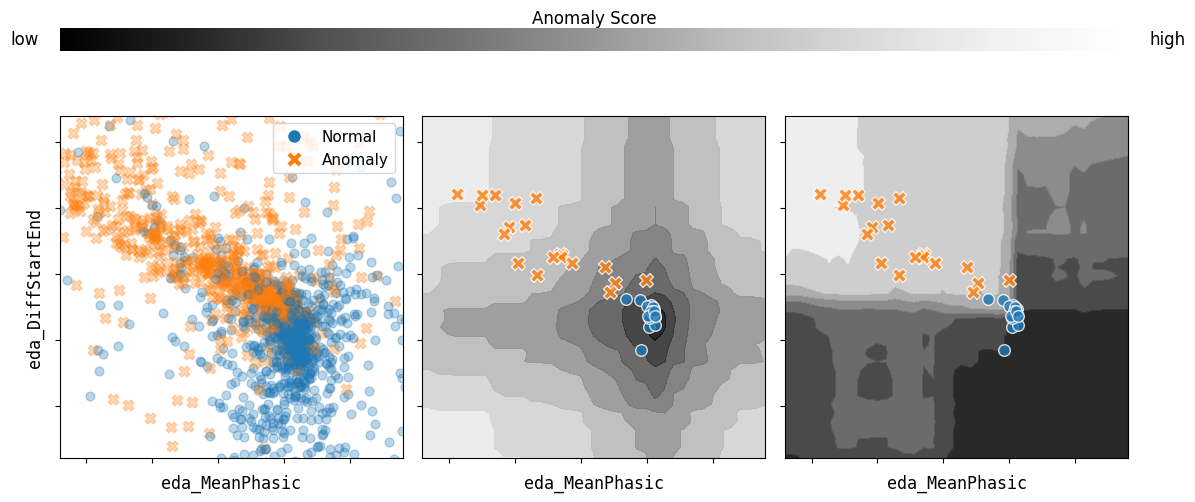

In [10]:
two_features = ['eda_MeanPhasic', 'eda_DiffStartEnd']
subject_id = '101609_m_36'
X_train = features[(features['subject_id'] != subject_id)][two_features].values
y_train = features[(features['subject_id'] != subject_id)]['class'].values
X_train_normal = features[(features['subject_id'] != subject_id) & (features['class'] == 0)][two_features].values
X_test = features[features['subject_id'] == subject_id][two_features].values
y_test = features[features['subject_id'] == subject_id]['class'].values

if_params = {'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 0.01, 'n_estimators': 50}
isolation_forest = IsolationForest(random_state=44, **if_params)
isolation_forest.fit(X_train_normal)

rf_params = params = {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
random_forest = RandomForestClassifier(random_state=44, **rf_params)
random_forest.fit(X_train, y_train)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[0.2, 5])

ax0 = fig.add_subplot(gs[0, :])
anomaly_score_colorbar(ax=ax0)

ax1 = fig.add_subplot(gs[1, 0])
scatter_plot(X_train, y_train, ax=ax1)

ax2 = fig.add_subplot(gs[1, 1])
plot_decision_boundary(isolation_forest, X_test, y_test, ax=ax2)

ax3 = fig.add_subplot(gs[1, 2])
plot_decision_boundary(random_forest, X_test, y_test, ax=ax3)

plt.tight_layout()
plt.show()

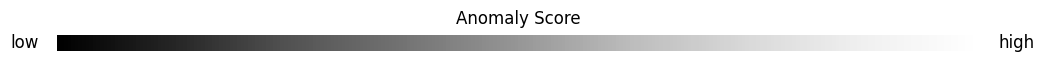

In [33]:
fig = plt.figure(figsize=(10.5, 0.5))
gs = gridspec.GridSpec(1, 1)

ax0 = fig.add_subplot(gs[0, :])
anomaly_score_colorbar(ax=ax0)

plt.tight_layout()
plt.savefig('anomaly_score_colorbar.pdf', format='pdf', bbox_inches='tight')
plt.show()

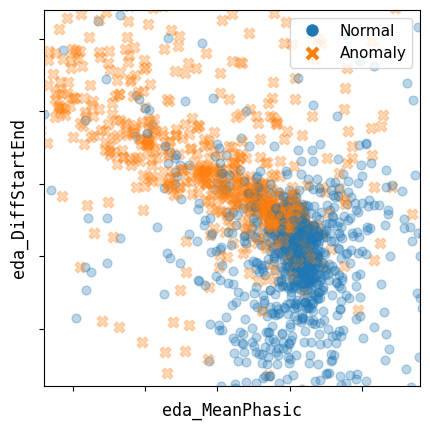

In [32]:
fig = plt.figure(figsize=(4.4,4.4))
gs = gridspec.GridSpec(1, 1)

ax0 = fig.add_subplot(gs[0, :])
scatter_plot(X_train, y_train, ax=ax0)

plt.tight_layout()
plt.savefig('training_data_scatter.pdf', format='pdf', bbox_inches='tight')
plt.show()

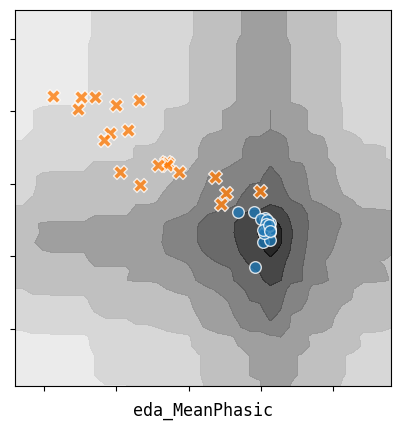

In [31]:
fig = plt.figure(figsize=(4.4,4.4))
gs = gridspec.GridSpec(1, 1)

ax0 = fig.add_subplot(gs[0, :])
plot_decision_boundary(isolation_forest, X_test, y_test, ax=ax0)

plt.tight_layout()
plt.savefig('decision_boundary_isolation_forest.pdf', format='pdf', bbox_inches='tight')
plt.show()

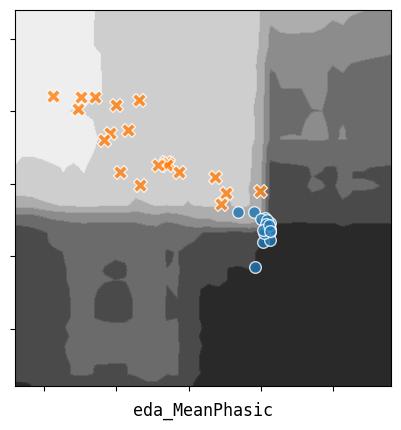

In [ ]:
fig = plt.figure(figsize=(4.4,4.4))
gs = gridspec.GridSpec(1, 1)

ax0 = fig.add_subplot(gs[0, :])
plot_decision_boundary(random_forest, X_test, y_test, ax=ax0)

plt.tight_layout()
plt.savefig('decision_boundary_random_forest.pdf', format='pdf', bbox_inches='tight')
plt.show()